In [167]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
from xgboost import XGBClassifier, XGBRegressor
import warnings
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import random
import copy
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [198]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Filter the dataset to only include samples with label 2

label_to_extract = 2

# Select training samples with the specified label
train_images_with_label = train_images[train_labels == label_to_extract]
train_labels_with_label = train_labels[train_labels == label_to_extract]

# Select test samples with the specified label
test_images_with_label = test_images[test_labels == label_to_extract]
test_labels_with_label = test_labels[test_labels == label_to_extract]

train_images = train_images_with_label
train_labels = train_labels_with_label

Train images shape: (5958, 28, 28)
Train labels: [2 2 2 ... 2 2 2]


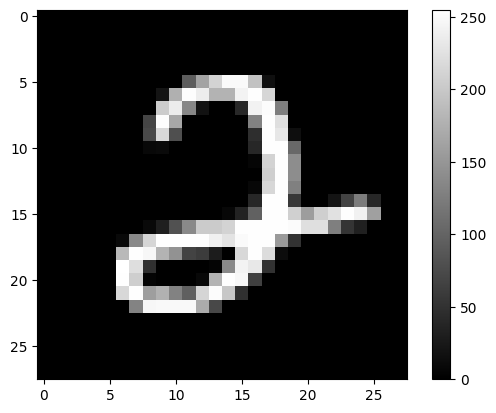

In [199]:

# Explore the dataset
print("Train images shape:", train_images.shape)
print("Train labels:", train_labels)

# Display an example image
plt.figure()
plt.imshow(train_images[1], cmap='gray')
plt.colorbar()
plt.show()

In [200]:
latent_dim = 3

rf = RandomForestRegressor(n_estimators=200, max_depth=6, random_state=0, max_samples=0.1, n_jobs=-1)
scaler = MinMaxScaler()
pca = PCA(n_components=latent_dim)
#tsne = TSNE(n_components=2, random_state=42, learning_rate='auto')

y = train_images.reshape(-1, 28*28).copy()
X = train_labels.reshape(-1, 1).copy().astype(float)

principle_components = pca.fit_transform(y)
X = scaler.fit_transform(principle_components)


print(X.shape, y.shape)

print('fitting')

rf.fit(X, y)

(5958, 3) (5958, 784)
fitting


RandomForestRegressor(max_depth=6, max_samples=0.1, n_estimators=200, n_jobs=-1,
                      random_state=0)

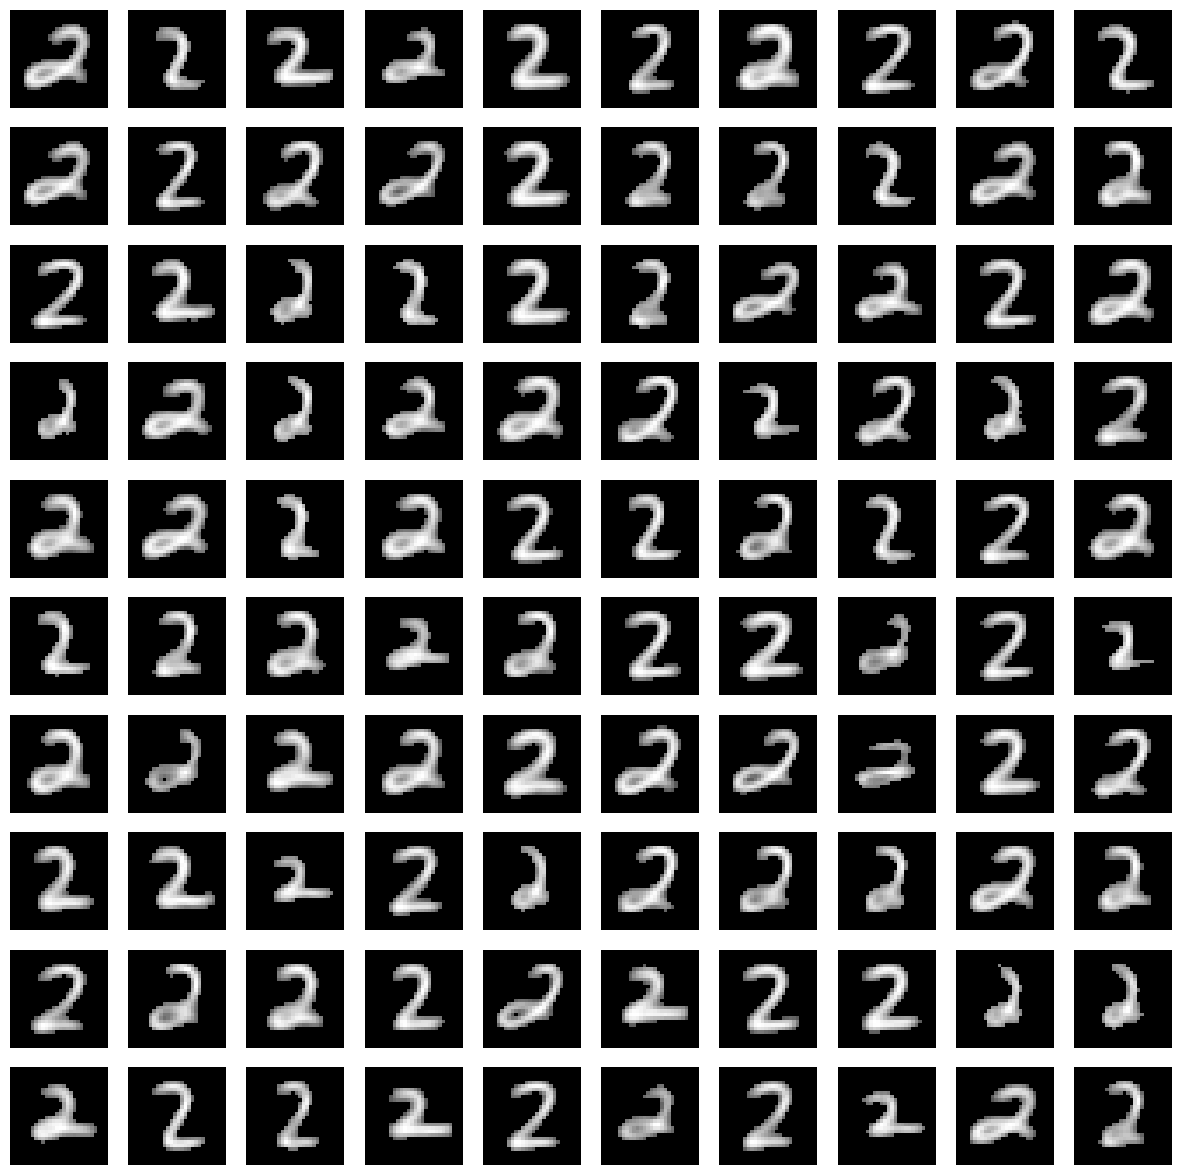

In [203]:
m = 100
threshold = 80
std_dev = 0.01

#input = np.array([[random.uniform(-3, 3) for j in range(latent_dim)] for i in range(m)]).reshape(m, latent_dim)
cov_matrix = np.identity(latent_dim) * std_dev
input = np.array([[np.random.multivariate_normal(random.choice(X), cov_matrix)] for i in range(m)]).reshape(m, -1)

y_pred = rf.predict(input)
y_pred = y_pred.reshape(m, 28, 28)
y_pred = np.where(y_pred < threshold, 0, y_pred)

fig, axs = plt.subplots(m//10, 10, figsize=(15, 15))
axs = axs.flatten()
# Plot data on the subplots
for i in range(m):
    axs[i].imshow(y_pred[i], cmap='gray')
    axs[i].axis('off')  # Turn off axis labels and ticks


(100, 2)


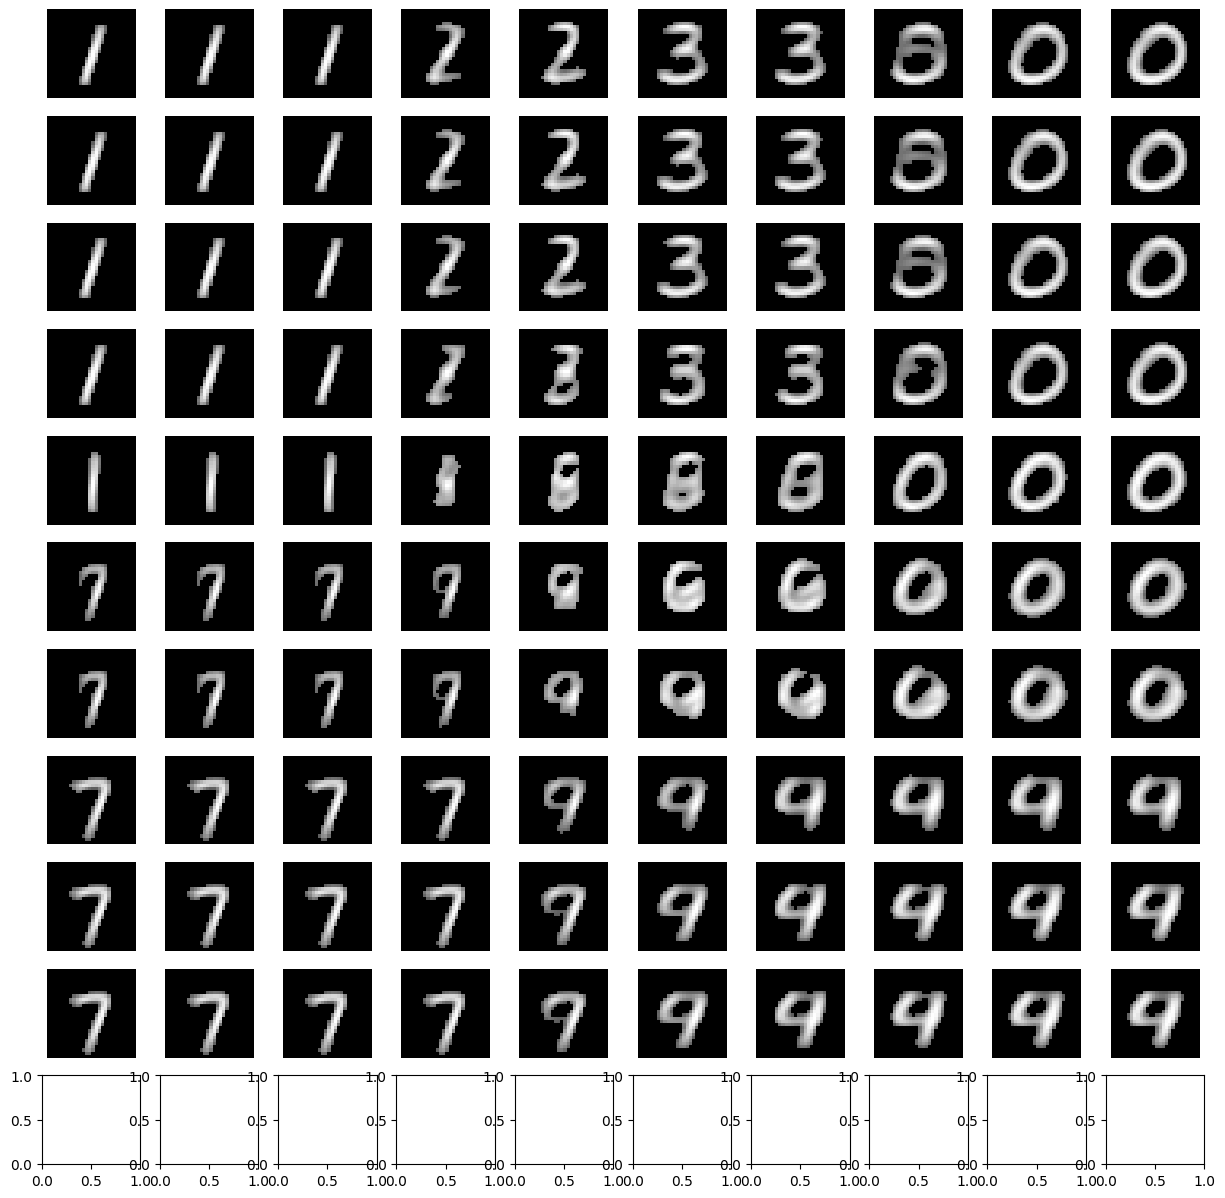

In [92]:
num_samples = 100

threshold = 90
digit= 2

# # Random sample
# input = np.array([random.uniform(-3, 3) for i in range(num_samples)]).reshape(num_samples, 1)
# print(input.shape)

# y_pred = rf.predict(input)
# y_pred = y_pred.reshape(num_samples, 28, 28)
# y_pred = np.where(y_pred < threshold, 0, y_pred)

# fig, axs = plt.subplots(10, 10, figsize=(15, 15))
# axs = axs.flatten()

# # Plot data on the subplots
# for i in range(num_samples):
#     axs[i].imshow(y_pred[i], cmap='gray')
#     axs[i].axis('off')  # Turn off axis labels and ticks


# Samples from left to rigth
m = 10
dim = [np.linspace(-3, 3, m) for i in range(latent_dim)]
input = np.stack(np.meshgrid(*dim), -1).reshape(m**latent_dim, latent_dim)

y_pred = rf.predict(input)
y_pred = y_pred.reshape(m**latent_dim, 28, 28)
y_pred = np.where(y_pred < threshold, 0, y_pred)

fig, axs = plt.subplots(m**latent_dim//10+1, 10, figsize=(15, 15))
axs = axs.flatten()

# Plot data on the subplots
for i in range(m**latent_dim):
    axs[i].imshow(y_pred[i], cmap='gray')
    axs[i].axis('off')  # Turn off axis labels and ticks


In [35]:
rf = RandomForestRegressor(n_estimators=200, max_depth=6, random_state=0, max_samples=0.1, n_jobs=-1)
pca = PCA(n_components=2)

sigma = 0.2
latent_dim = 2

y = train_images.reshape(-1, 28*28).copy()
X = train_labels.reshape(-1, 1).copy()
X = X.astype(float)

N = len(X)
X2 = np.zeros((N, latent_dim))

for i in range(N):
    r = [np.random.normal(0, sigma, 1)[0] for j in range(latent_dim)]
    X2[i] = [X[i, 0] + r[j] for j in range(latent_dim)] 

X = X2
print(X.shape, y.shape)
rf.fit(X, y)

(60000, 5) (60000, 784)


RandomForestRegressor(max_depth=6, max_samples=0.1, n_estimators=200, n_jobs=-1,
                      random_state=0)

2
(10, 2)


IndexError: index 10 is out of bounds for axis 0 with size 10

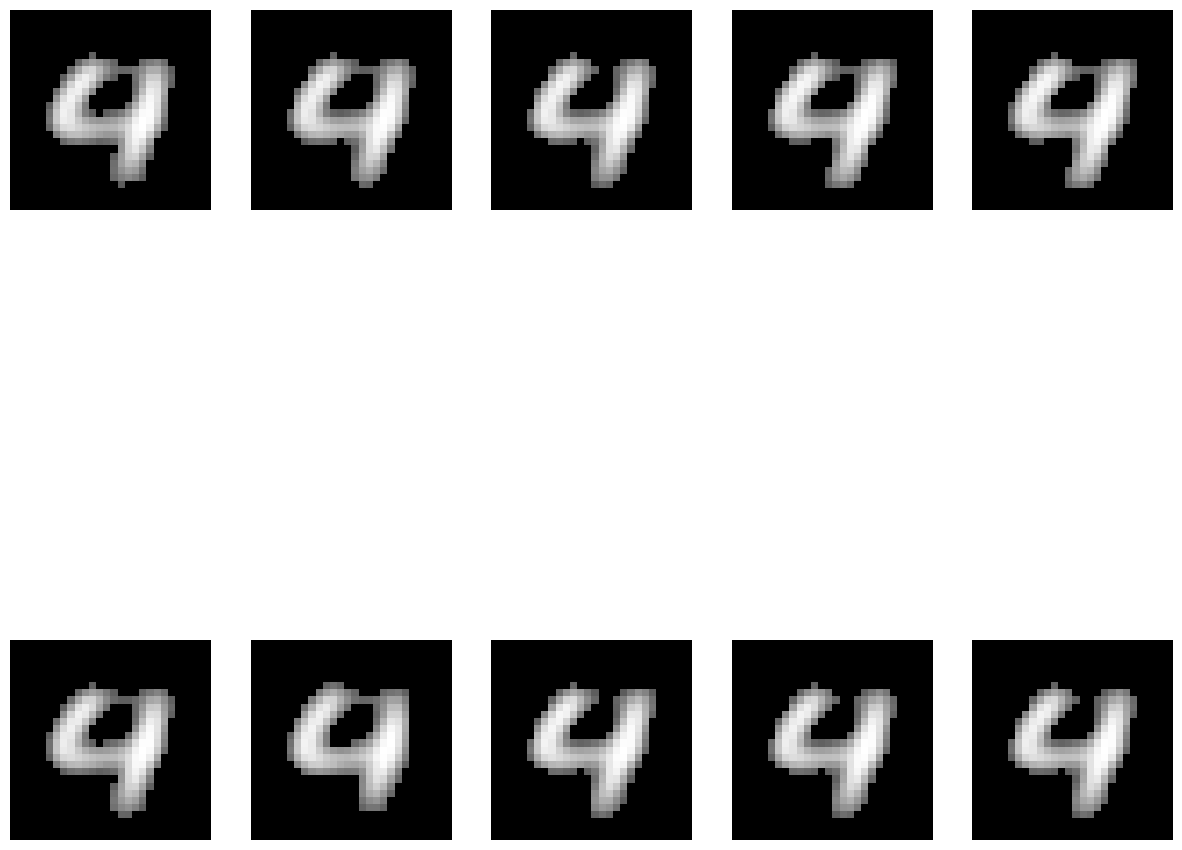

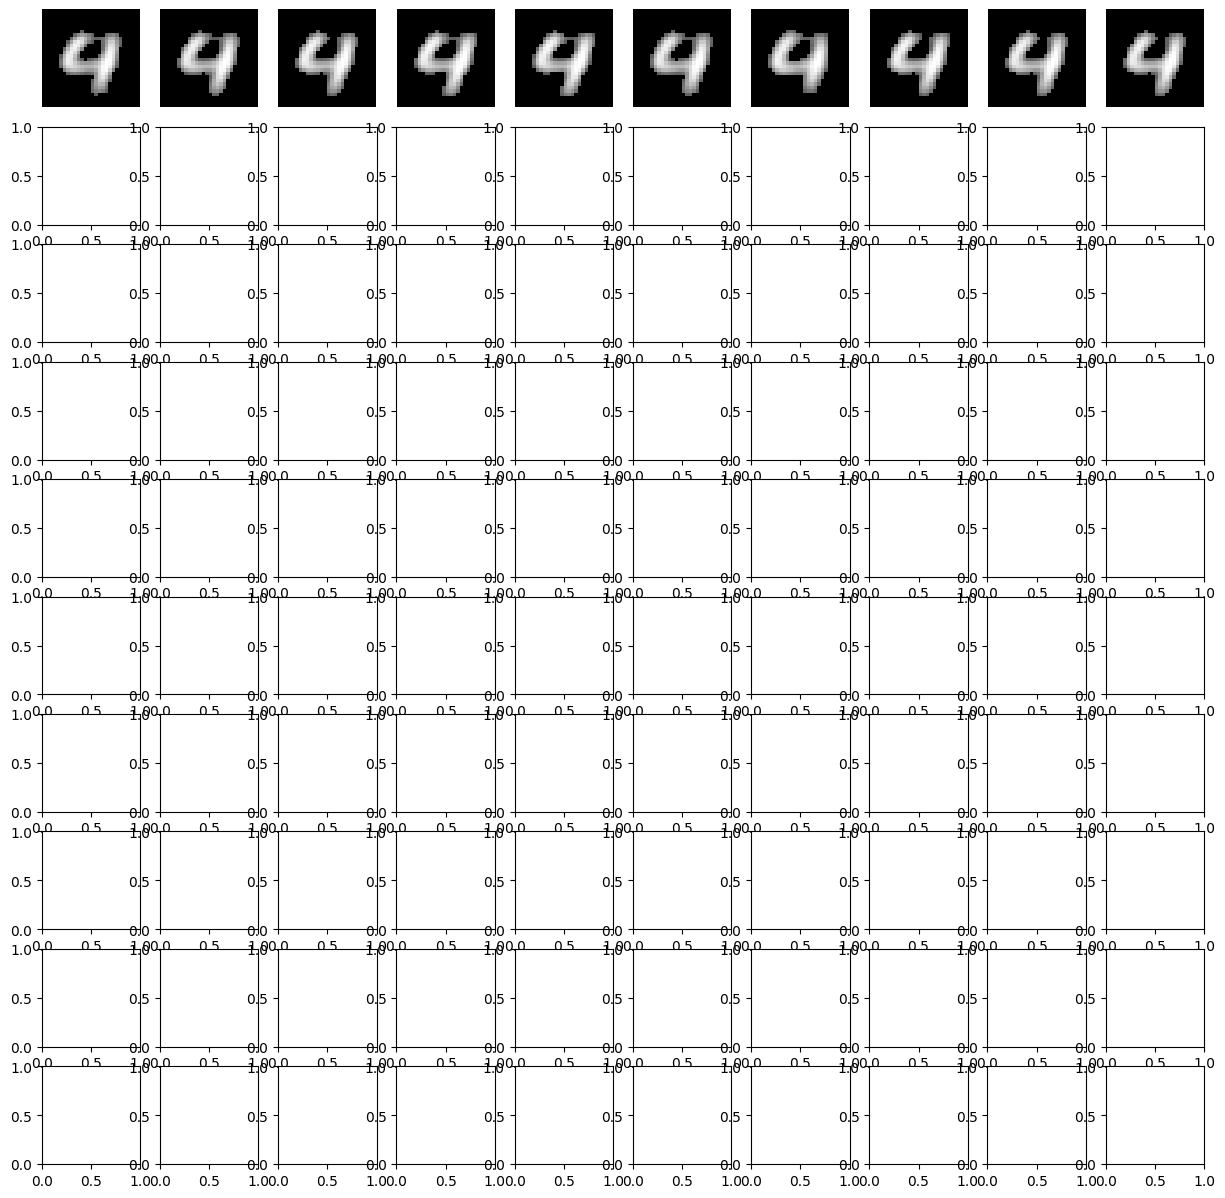

In [71]:
num_samples = 10

threshold = 90
digit= 2

print(latent_dim)
input = np.array([[digit + np.random.normal(0, sigma) for j in range(latent_dim)] for i in range(num_samples)]) #.reshape(-1, 1)
print(input.shape)

y_pred = rf.predict(input)
y_pred = y_pred.reshape(num_samples, 28, 28)
y_pred = np.where(y_pred < threshold, 0, y_pred)

fig, axs = plt.subplots(2, 5, figsize=(15, 15))
axs = axs.flatten()
# Plot data on the subplots
for i in range(num_samples):
    axs[i].imshow(y_pred[i], cmap='gray')
    axs[i].axis('off')  # Turn off axis labels and ticks

fig, axs = plt.subplots(2, 5, figsize=(15, 15))
axs = axs.flatten()
# Plot data on the subplots
for i in range(num_samples):
    axs[i].imshow(y_pred[i], cmap='gray')
    axs[i].axis('off')  # Turn off axis labels and ticks



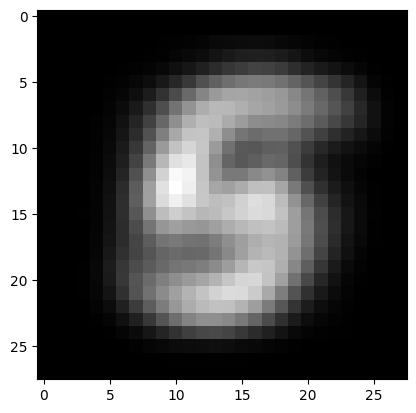

In [19]:
plt.imshow(y_pred[0], cmap='gray')


[ 0.11470535 -0.23734702 -0.15462362  0.17718676  0.0985037  -0.09356283
 -0.18676982  0.25236159 -0.39956497  0.32827885  0.31266977 -0.25170213
 -0.34188687 -0.17643795 -0.18329764 -0.33391127 -0.15795281 -0.17109261
 -0.04155788  0.41992037  0.07753373  0.17193058  0.20221295 -0.11589756
  0.40959202]
-1251.1507774997588


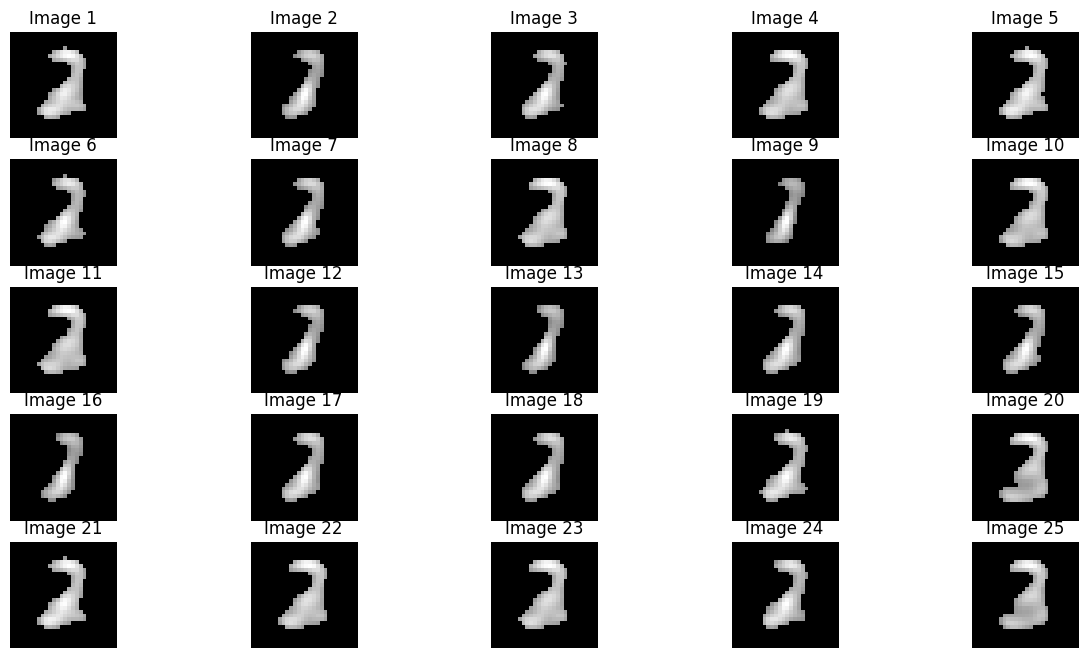

In [30]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(5, 5, figsize=(15, 8))
threshold = 100
noise = np.array([random.uniform(-sigma, sigma) for i in range(num_samples)])
# Flatten the axs array for easier indexing
axs = axs.flatten()

num_samples = 25
noise = np.array([random.uniform(-sigma, sigma) for i in range(num_samples)])
input = np.array([[2 + noise[i], 2 + noise[i]] for i in range(num_samples)])

y_pred = rf.predict(input)
y_pred = y_pred.reshape(num_samples, 28, 28)

y_pred = np.where(y_pred < threshold, 0, y_pred)

# Plot data on the subplots
for i in range(num_samples):
    #y_pred = rf.predict([[0 + random.uniform(-sigma, sigma)]])
    #y_pred[i] = y_pred[i].reshape(28, 28)
    axs[i].imshow(y_pred[i], cmap='gray')
    axs[i].set_title(f'Image {i+1}')
    axs[i].axis('off')  # Turn off axis labels and ticks

print(noise)
print(sum(y_pred[1].flatten()- y_pred[2].flatten()))


In [ ]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(10, 20, figsize=(15, 15))
threshold = 90

# Flatten the axs array for easier indexing
axs = axs.flatten()

num_samples = 200
# noise = np.array([random.uniform(-sigma, sigma) for i in range(num_samples)])
# input = np.array([[3.5 + noise[i]] for i in range(num_samples)])
noise = np.array([random.uniform(-sigma, sigma) for i in range(num_samples)])

input = np.array([0 + i*(10/num_samples) for i in range(num_samples)]).reshape(-1, 1)

y_pred = rf.predict(input)
y_pred = y_pred.reshape(num_samples, 28, 28)

y_pred = np.where(y_pred < threshold, 0, y_pred)

# Plot data on the subplots
for i in range(num_samples):
    #y_pred = rf.predict([[0 + random.uniform(-sigma, sigma)]])
    #y_pred[i] = y_pred[i].reshape(28, 28)
    axs[i].imshow(y_pred[i], cmap='gray')
    #axs[i].set_title(f'img {i+1}')
    axs[i].axis('off')  # Turn off axis labels and ticks

#print(sum(y_pred[1].flatten()- y_pred[2].flatten()))

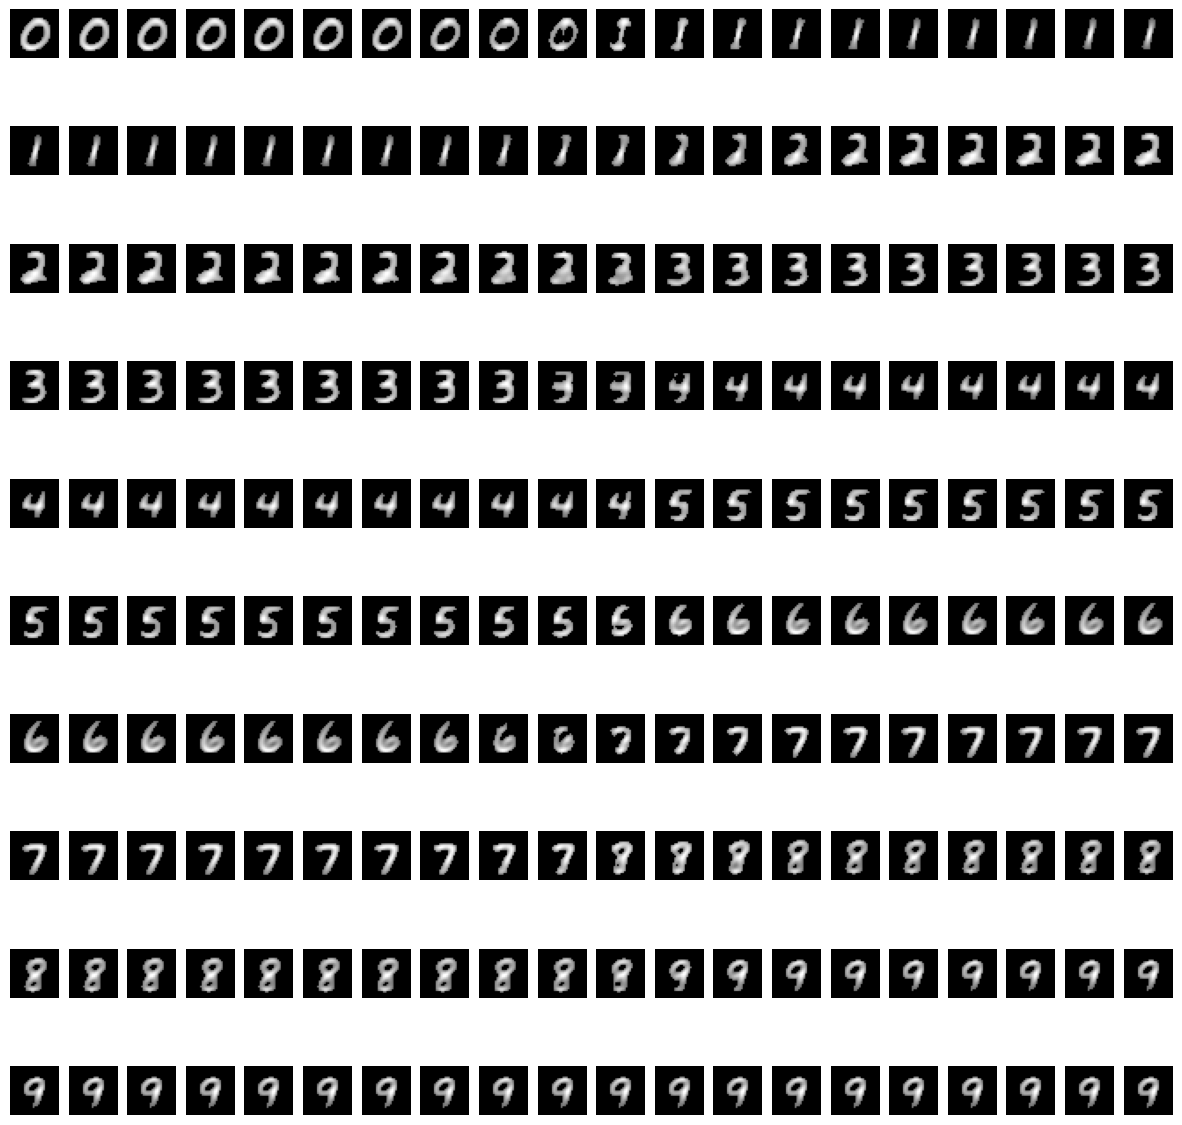

In [43]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(10, 20, figsize=(15, 15))
threshold = 90

# Flatten the axs array for easier indexing
axs = axs.flatten()

num_samples = 200
# noise = np.array([random.uniform(-sigma, sigma) for i in range(num_samples)])
# input = np.array([[3.5 + noise[i]] for i in range(num_samples)])
noise = np.array([random.uniform(-sigma, sigma) for i in range(num_samples)])

input = np.array([[0 + i*(10/num_samples), 0 + i*(10/num_samples)] for i in range(num_samples)]) #.reshape(-1, 1)

y_pred = rf.predict(input)
y_pred = y_pred.reshape(num_samples, 28, 28)

y_pred = np.where(y_pred < threshold, 0, y_pred)

# Plot data on the subplots
for i in range(num_samples):
    #y_pred = rf.predict([[0 + random.uniform(-sigma, sigma)]])
    #y_pred[i] = y_pred[i].reshape(28, 28)
    axs[i].imshow(y_pred[i], cmap='gray')
    #axs[i].set_title(f'img {i+1}')
    axs[i].axis('off')  # Turn off axis labels and ticks

#print(sum(y_pred[1].flatten()- y_pred[2].flatten()))

In [44]:
# Assuming 'old_array' is your original NumPy array
old_array = np.array([[1, 2, 3],
                      [4, 5, 6],
                      [7, 8, 9]])

# Repeat each row three times consecutively
new_array = np.repeat(old_array, 3, axis=0)

print(new_array)

[[1 2 3]
 [1 2 3]
 [1 2 3]
 [4 5 6]
 [4 5 6]
 [4 5 6]
 [7 8 9]
 [7 8 9]
 [7 8 9]]
